# One dimensional Neural Network

In [ ]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

# Load Dataset

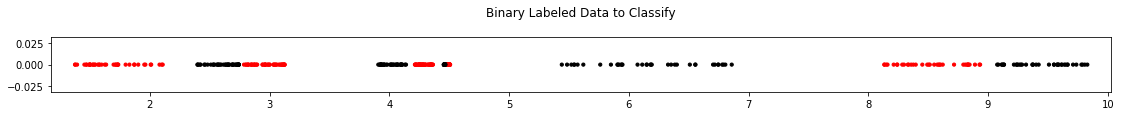

In [2]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions=10, validation = 0.20, points=50)
nregion.graph(X_train, Y_train, size = 10)

# Create Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 5, Activation: absolute, Weights: (5, 1), Biases: (5, 1)
Layer: L2, Neurons: 5, Activation: relu, Weights: (5, 5), Biases: (5, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 5), Biases: (1, 1)


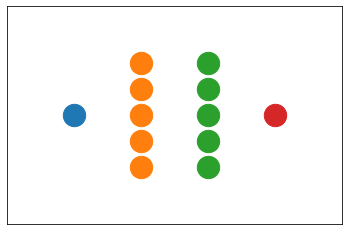

In [3]:
N = len(C)
mynetwork = Network(1)
mynetwork.add_layer(N, activation = 'absolute' )
mynetwork.add_layer(N, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

In [5]:
mynetwork.reset_weights_to_zero()

In [18]:
R[4]

0.4061596351565795

training for center #1 at 2.57


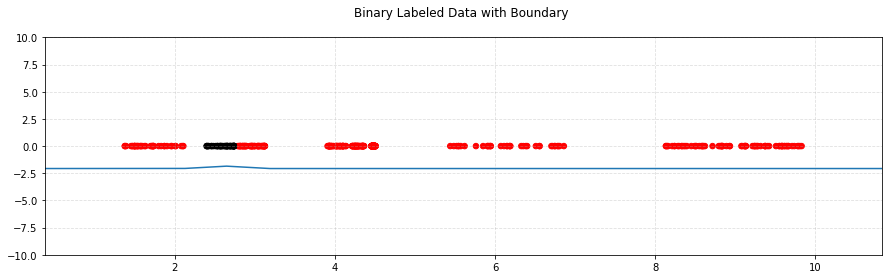

loss: 0.320 acc:  90%


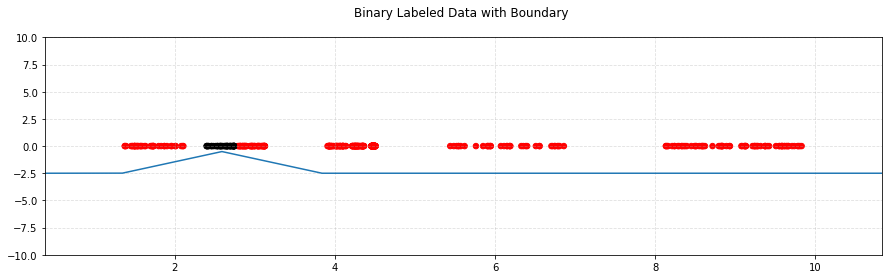

loss: 0.213 acc:  90%


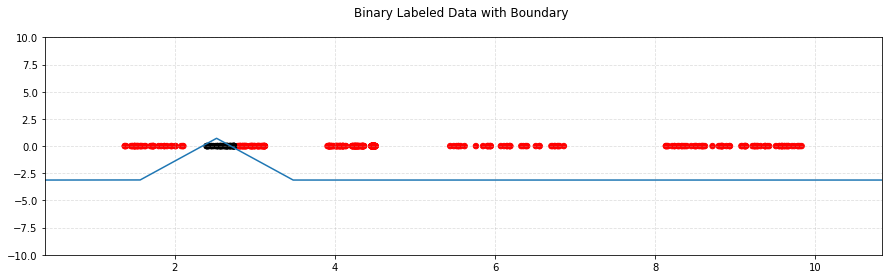

loss: 0.137 acc:  97%


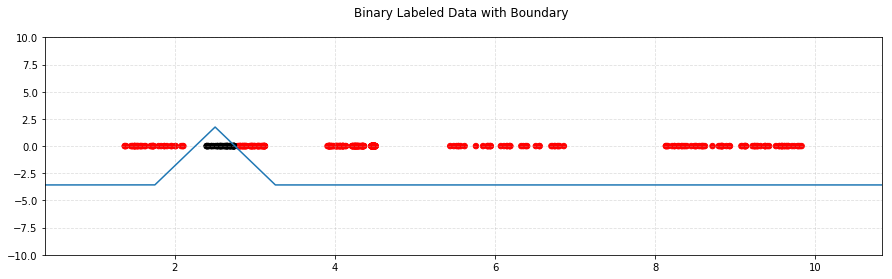

loss: 0.093 acc:  100%
training for center #2 at 4.02


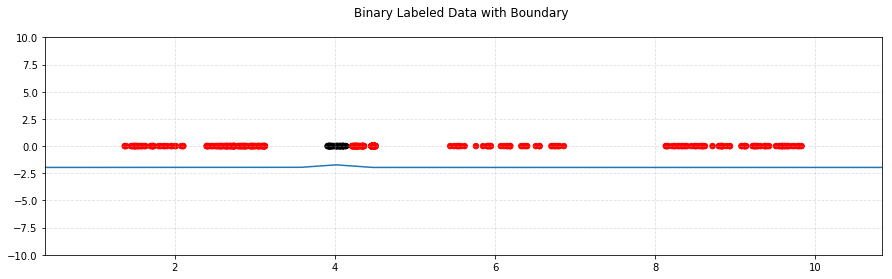

loss: 0.298 acc:  91%


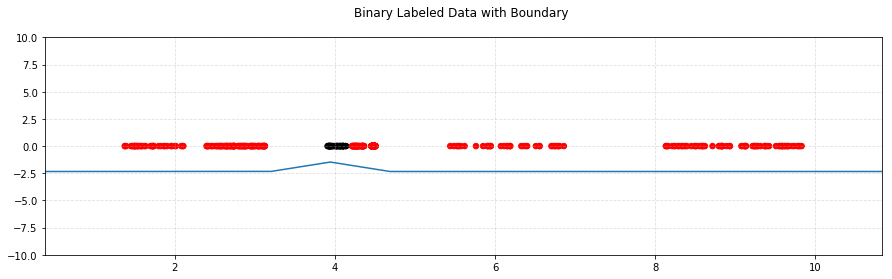

loss: 0.256 acc:  91%


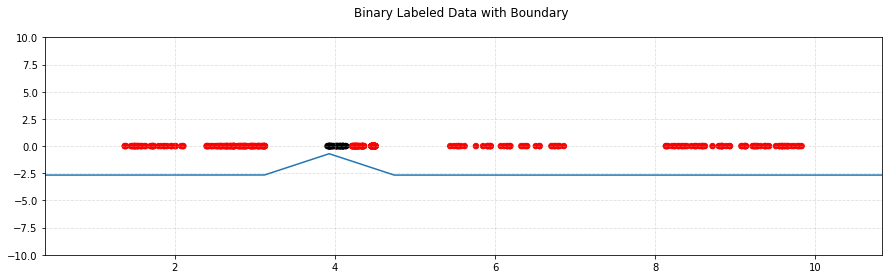

loss: 0.201 acc:  91%


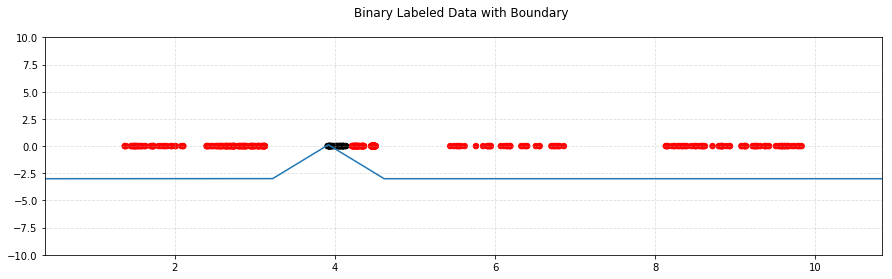

loss: 0.148 acc:  93%


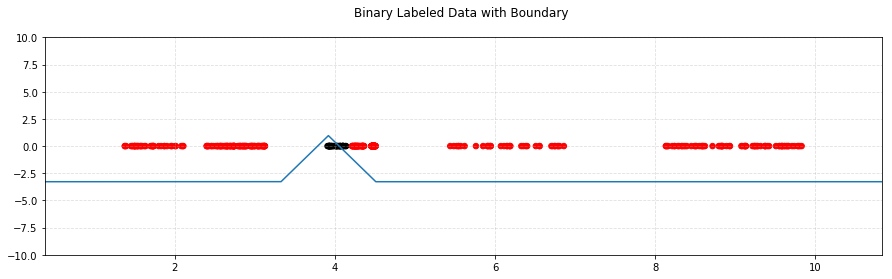

loss: 0.105 acc:  96%


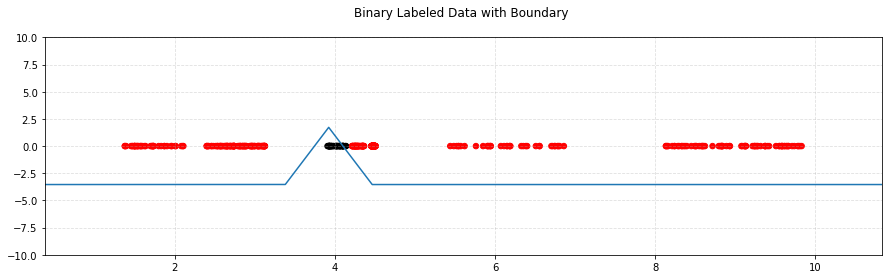

loss: 0.078 acc:  98%


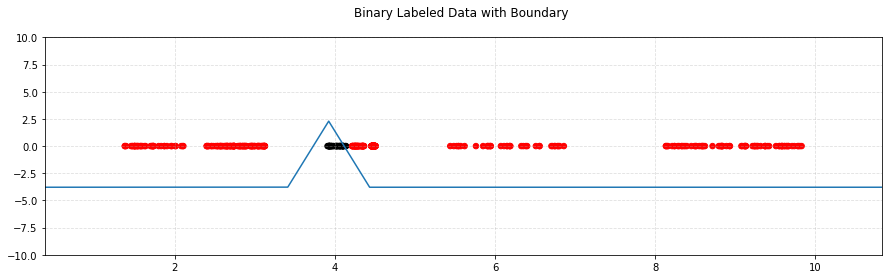

loss: 0.063 acc:  100%


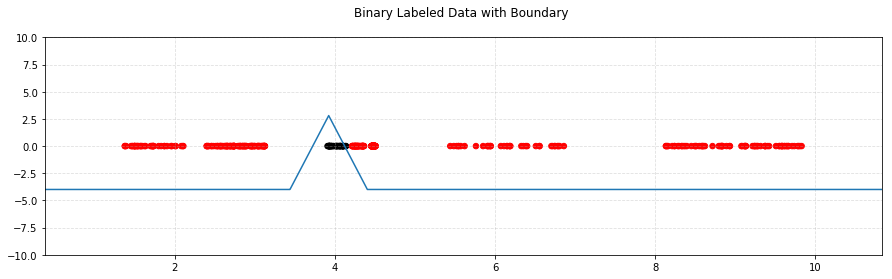

loss: 0.052 acc:  100%


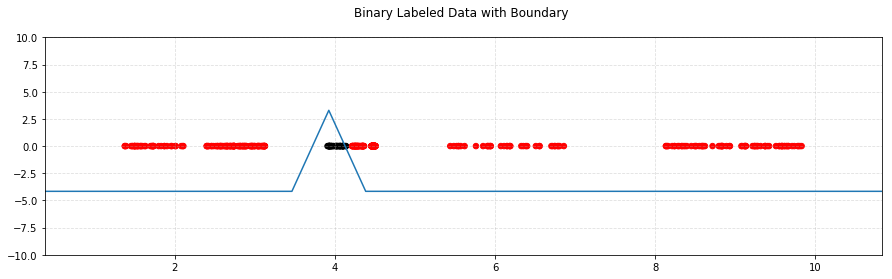

loss: 0.044 acc:  100%


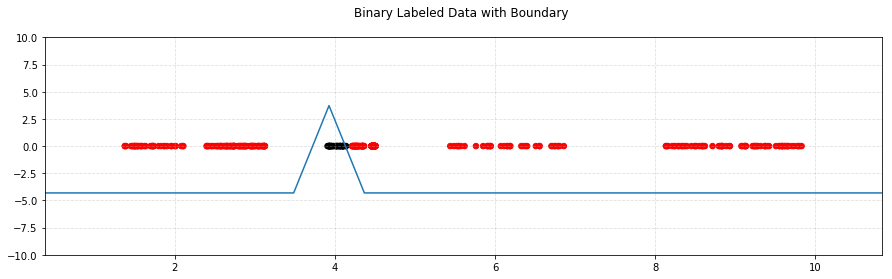

loss: 0.037 acc:  100%


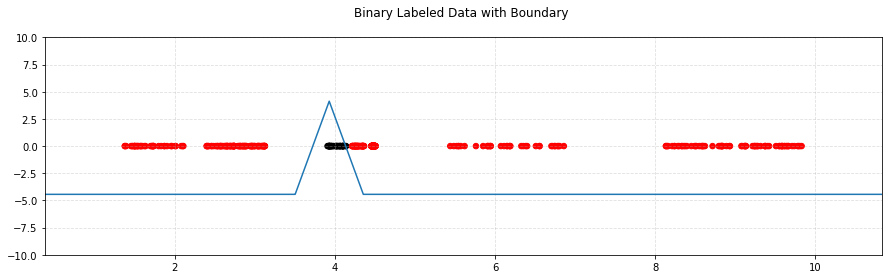

loss: 0.032 acc:  100%


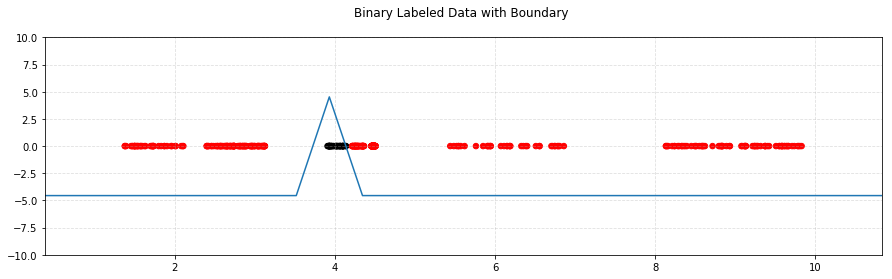

loss: 0.029 acc:  100%


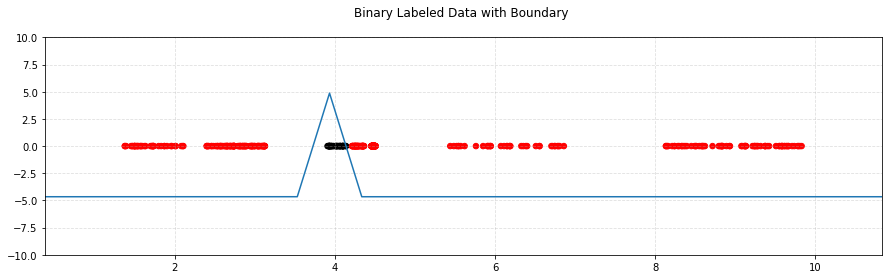

loss: 0.026 acc:  100%


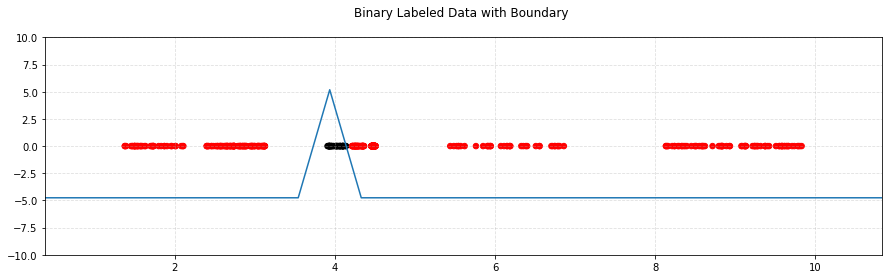

loss: 0.023 acc:  100%
training for center #3 at 4.47


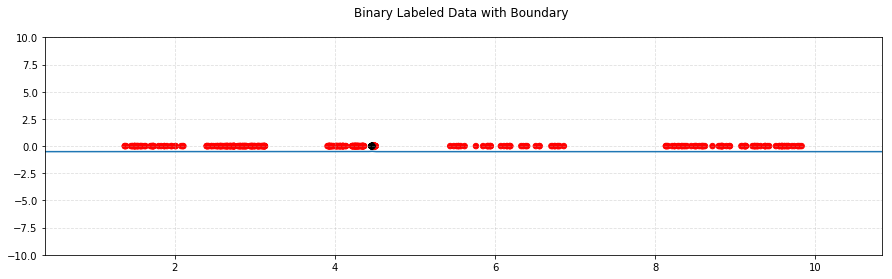

loss: 0.519 acc:  90%


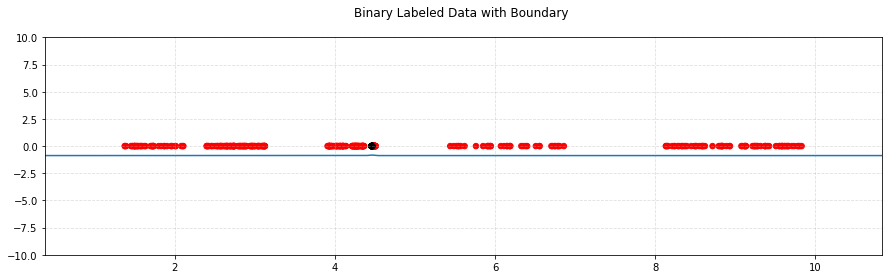

loss: 0.434 acc:  90%


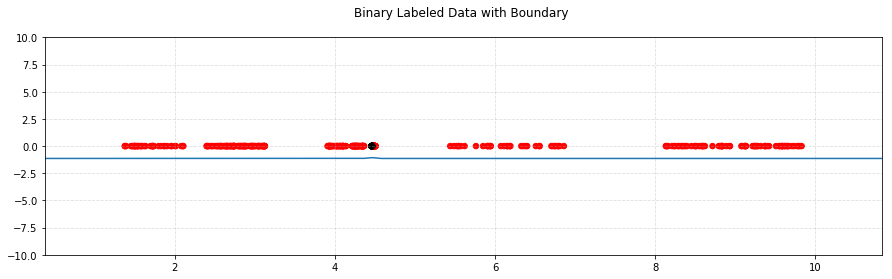

loss: 0.388 acc:  90%


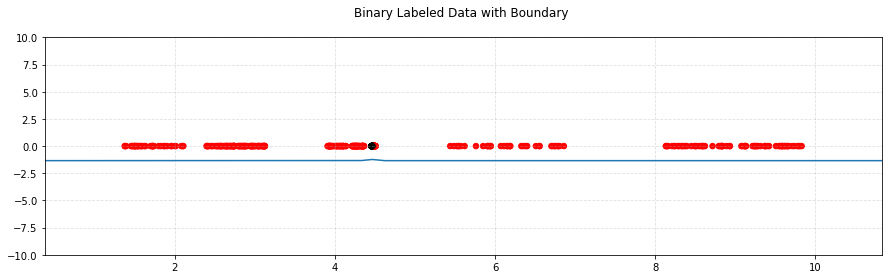

loss: 0.360 acc:  90%


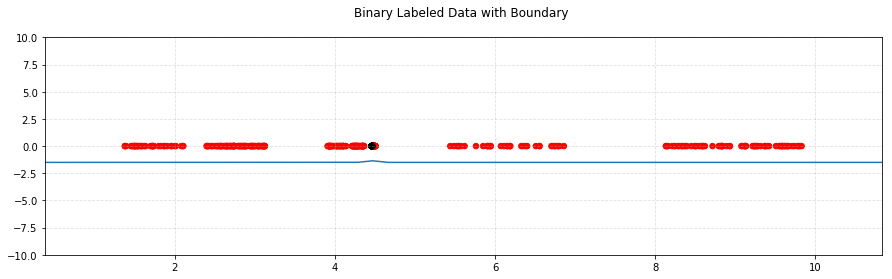

loss: 0.343 acc:  90%


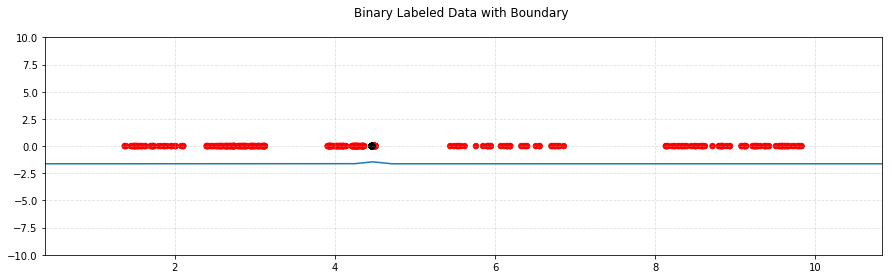

loss: 0.331 acc:  90%


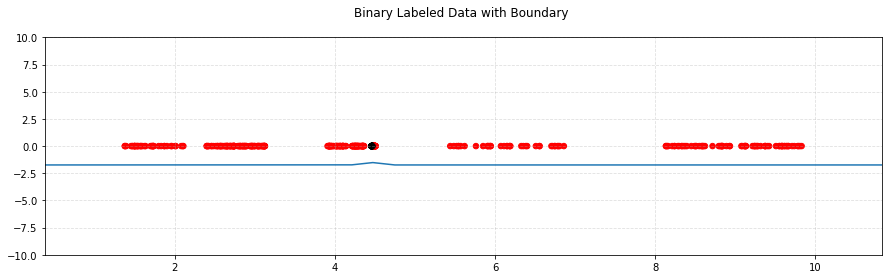

loss: 0.322 acc:  90%


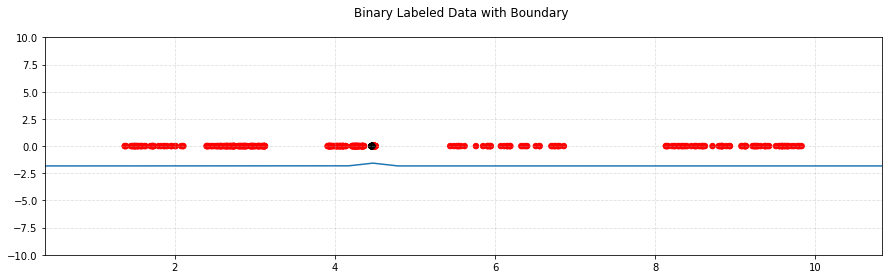

loss: 0.316 acc:  90%


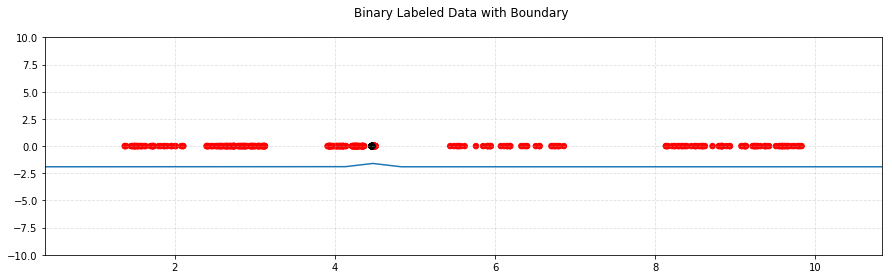

loss: 0.310 acc:  90%


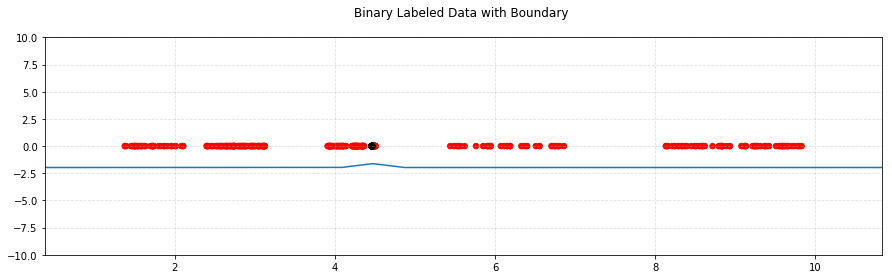

loss: 0.305 acc:  90%


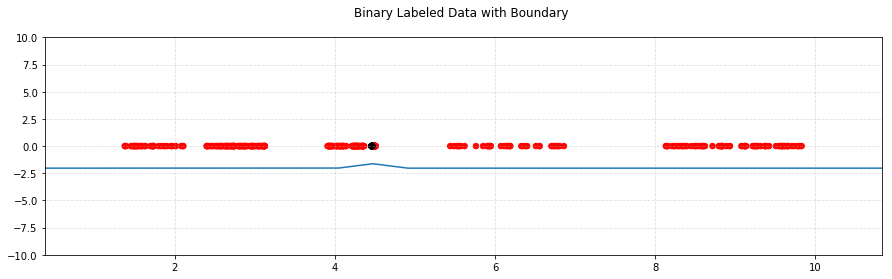

loss: 0.301 acc:  90%


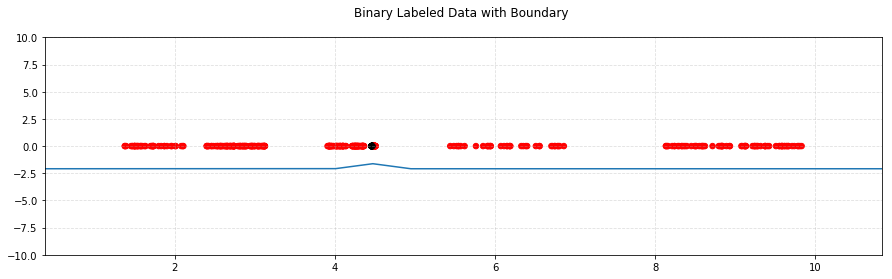

loss: 0.296 acc:  90%


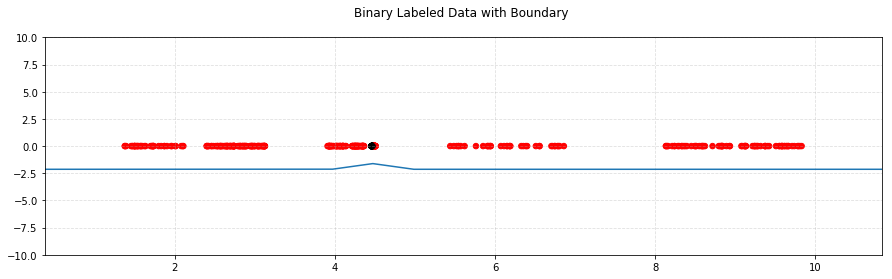

loss: 0.292 acc:  90%


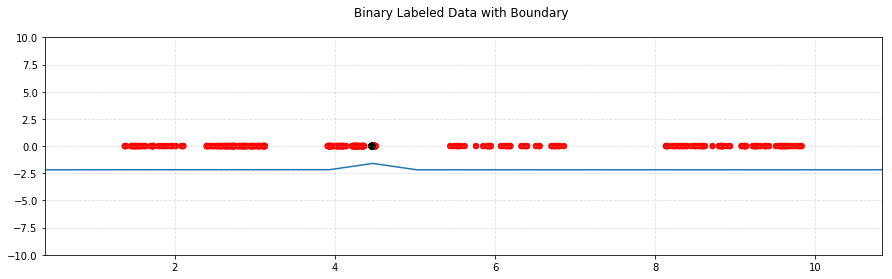

loss: 0.288 acc:  90%


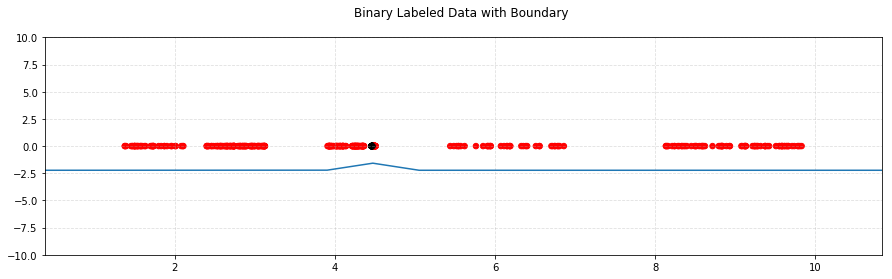

loss: 0.285 acc:  90%


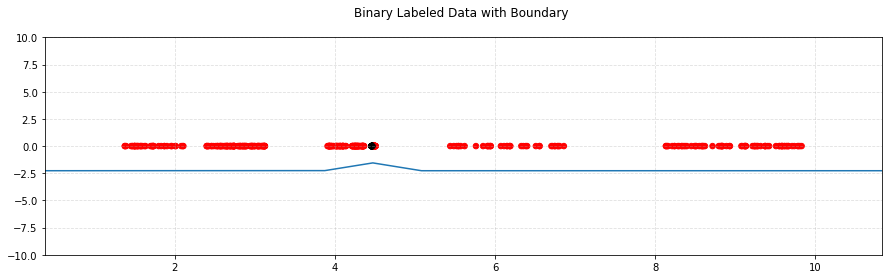

loss: 0.281 acc:  90%


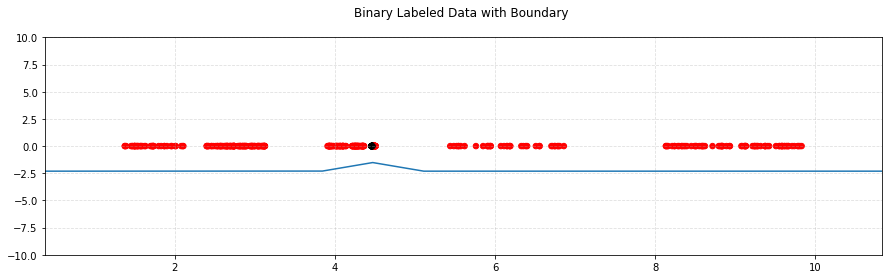

loss: 0.277 acc:  90%


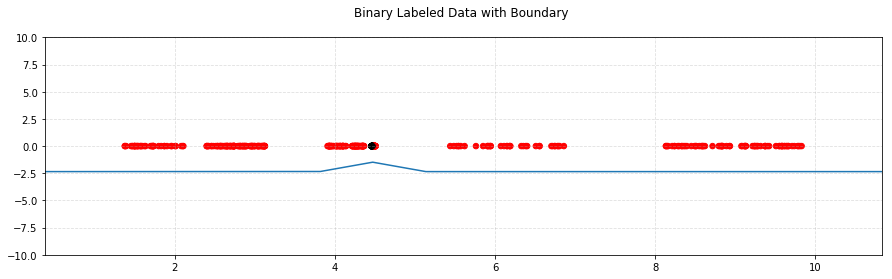

loss: 0.273 acc:  90%


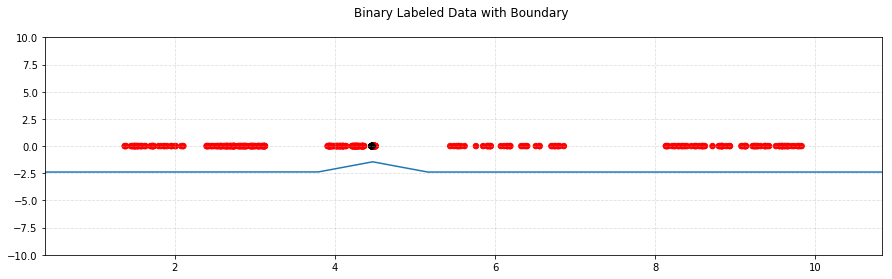

loss: 0.269 acc:  90%


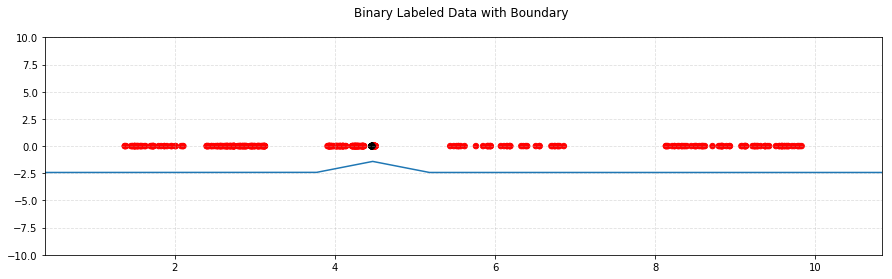

loss: 0.266 acc:  90%


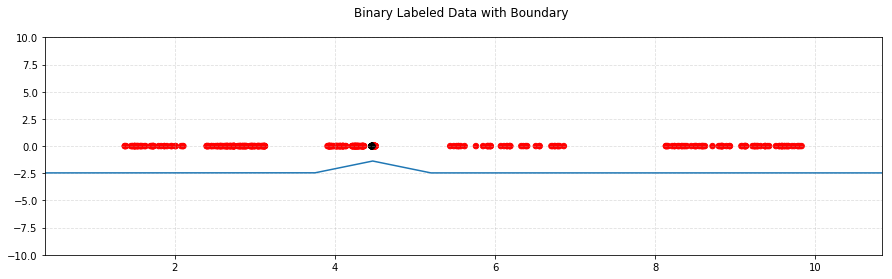

loss: 0.262 acc:  90%


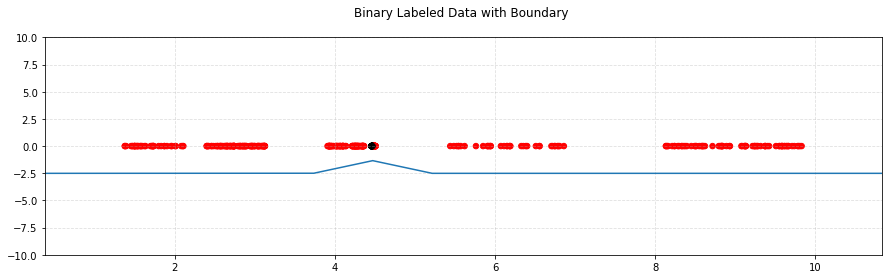

loss: 0.259 acc:  90%


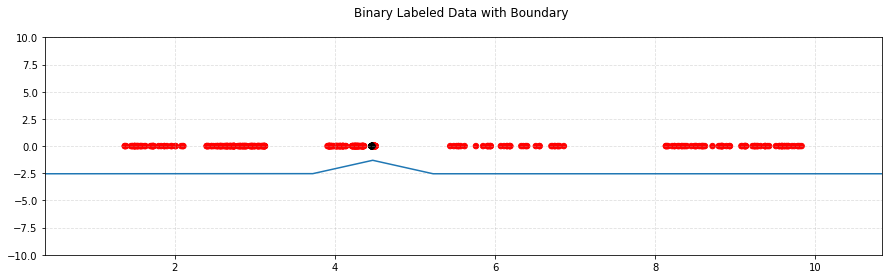

loss: 0.255 acc:  90%


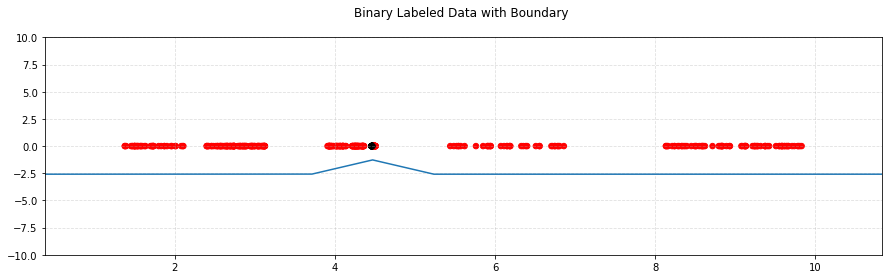

loss: 0.252 acc:  90%


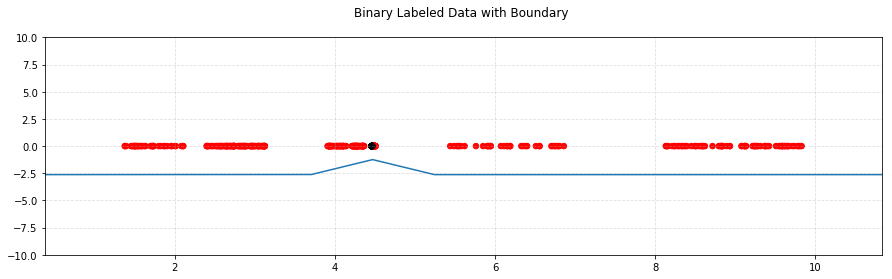

loss: 0.249 acc:  90%


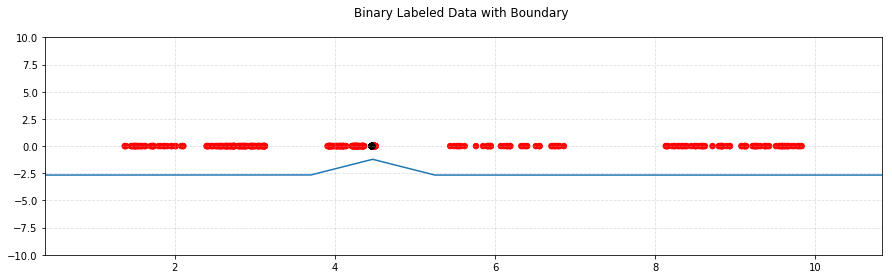

loss: 0.246 acc:  90%


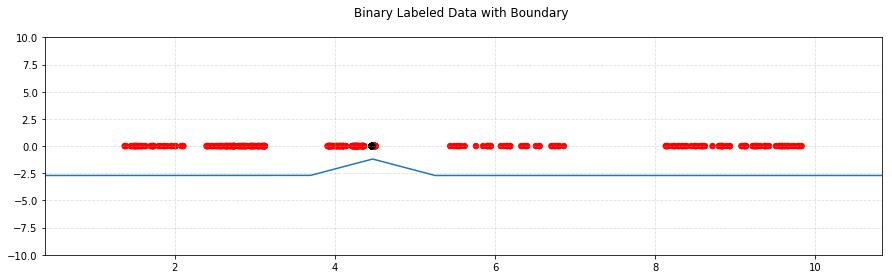

loss: 0.244 acc:  90%


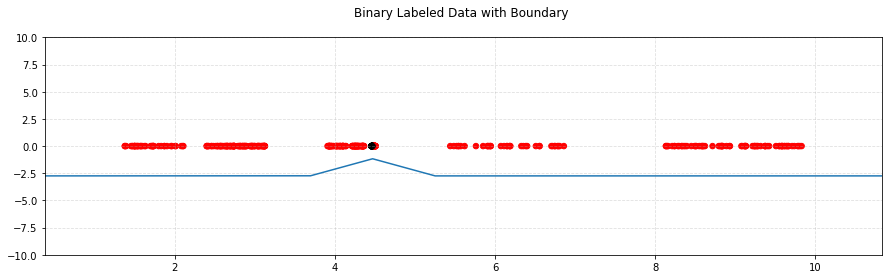

loss: 0.241 acc:  90%


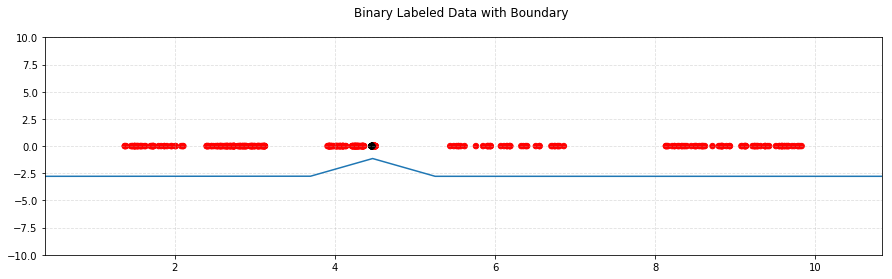

loss: 0.239 acc:  90%


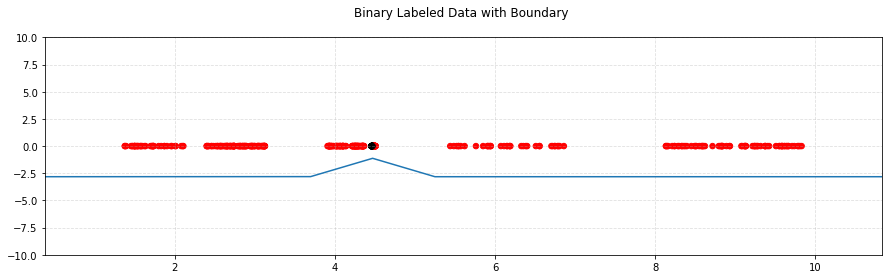

loss: 0.236 acc:  90%


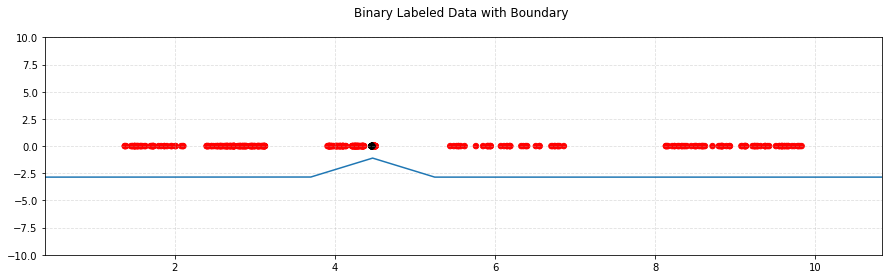

loss: 0.234 acc:  90%


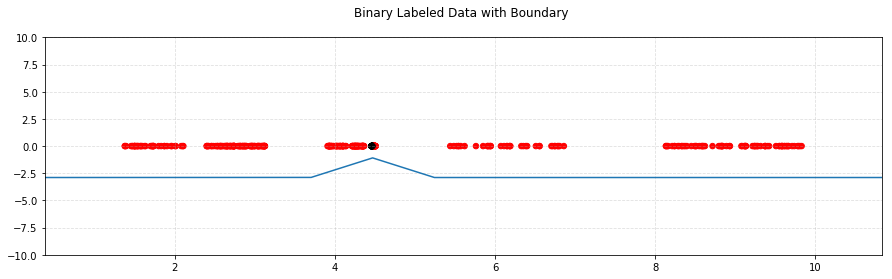

loss: 0.232 acc:  90%


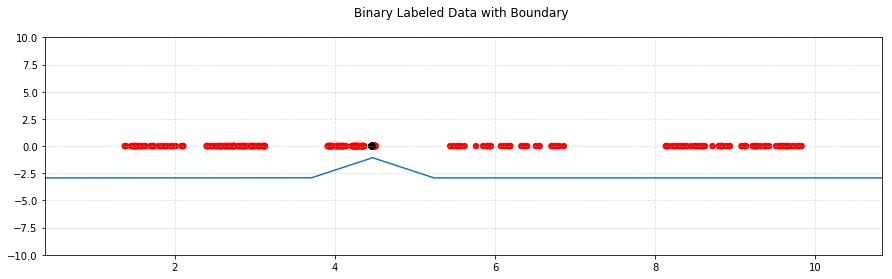

loss: 0.230 acc:  90%


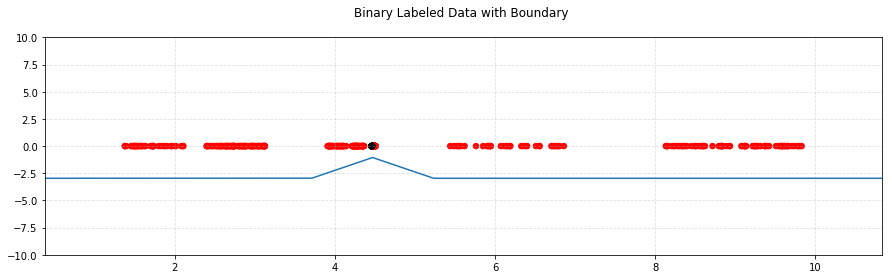

loss: 0.228 acc:  90%


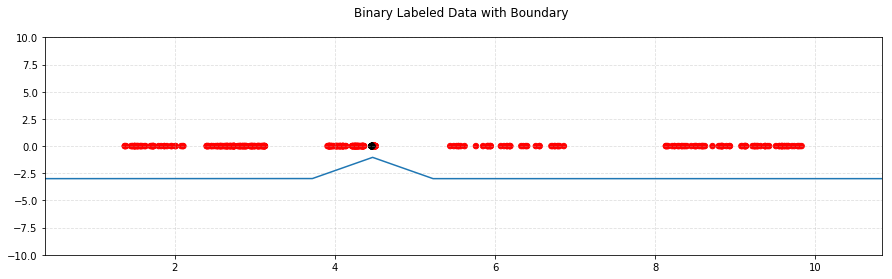

loss: 0.226 acc:  90%


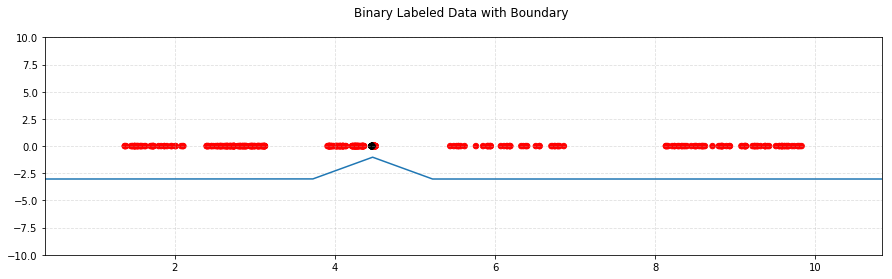

loss: 0.224 acc:  90%


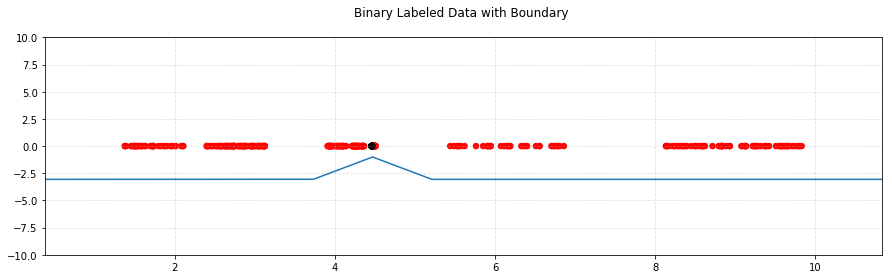

loss: 0.222 acc:  90%


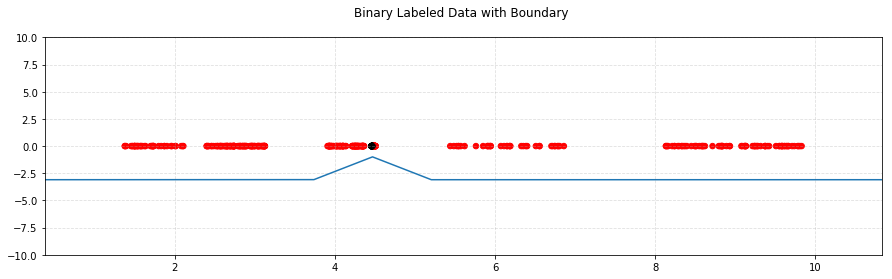

loss: 0.220 acc:  90%


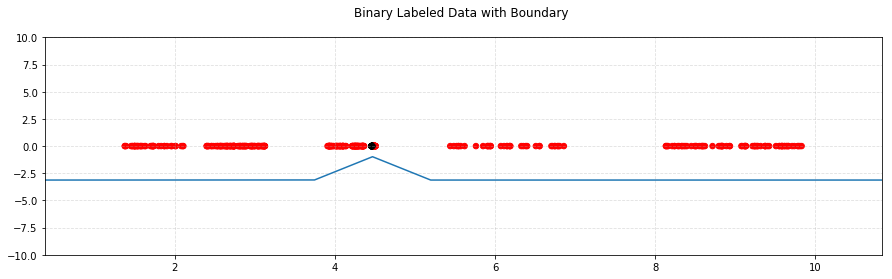

loss: 0.218 acc:  90%


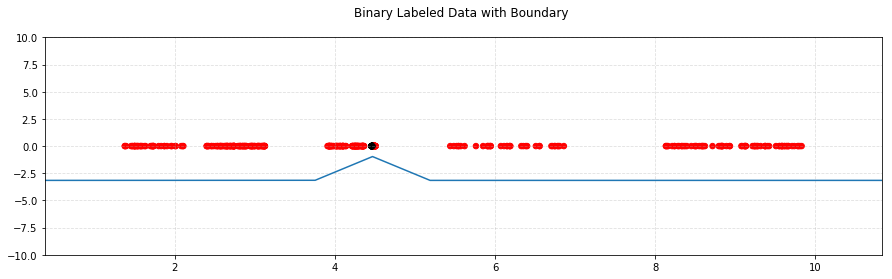

loss: 0.217 acc:  90%


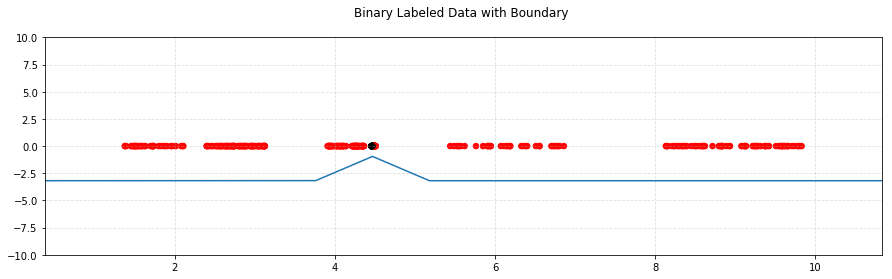

loss: 0.215 acc:  90%


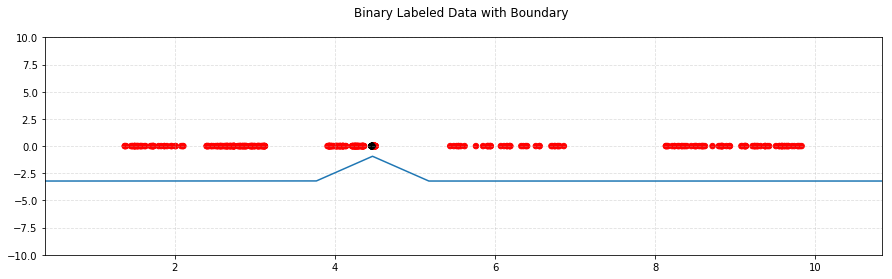

loss: 0.214 acc:  90%


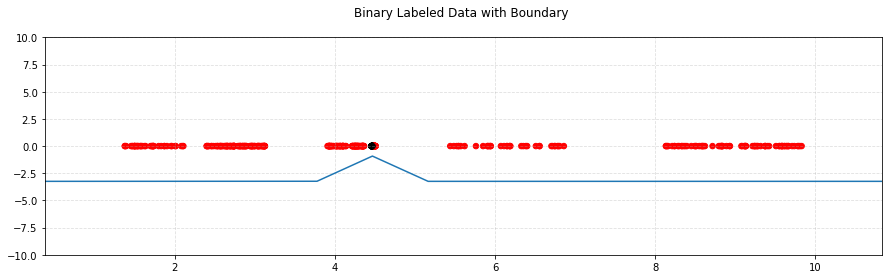

loss: 0.212 acc:  90%


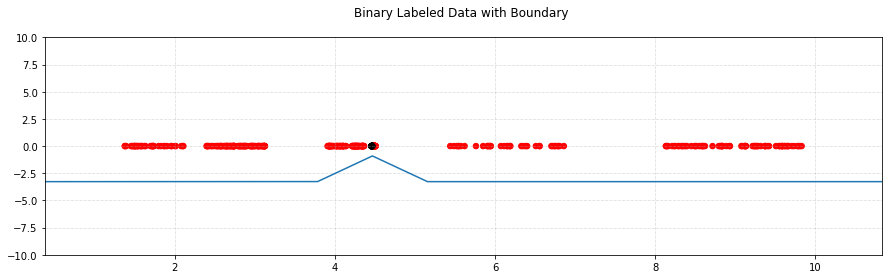

loss: 0.210 acc:  90%


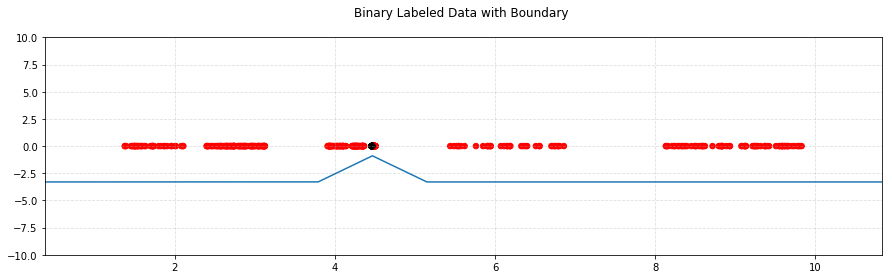

loss: 0.209 acc:  90%


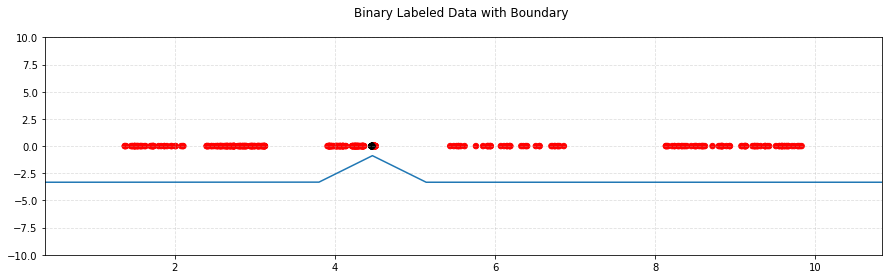

loss: 0.208 acc:  90%


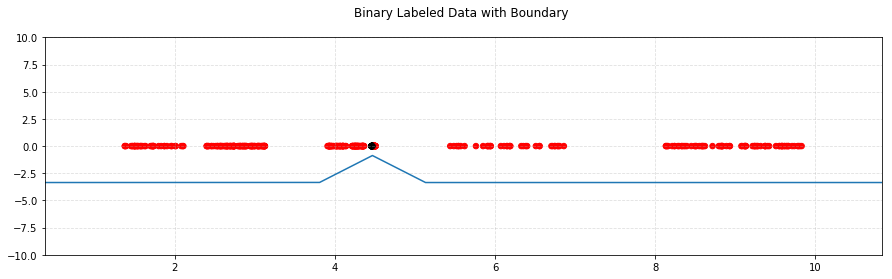

loss: 0.206 acc:  90%


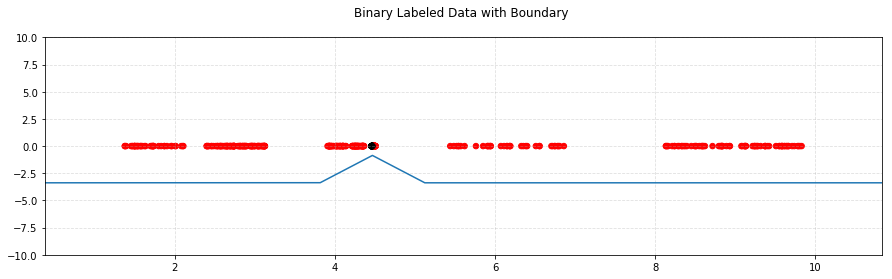

loss: 0.205 acc:  90%


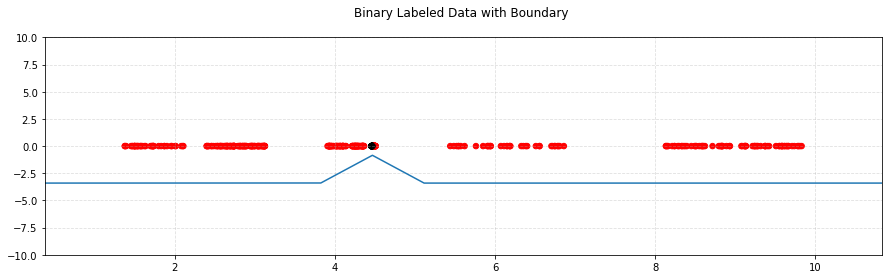

loss: 0.203 acc:  90%


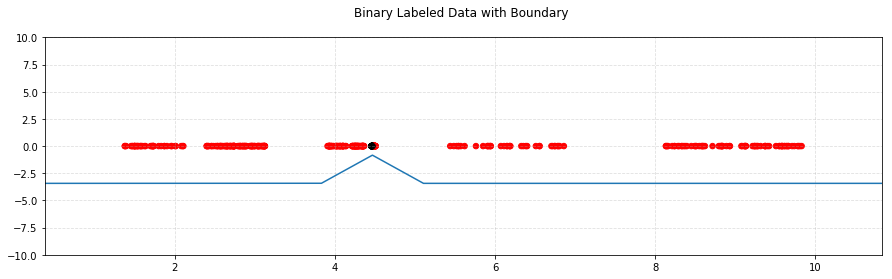

loss: 0.202 acc:  90%
training for center #4 at 6.18


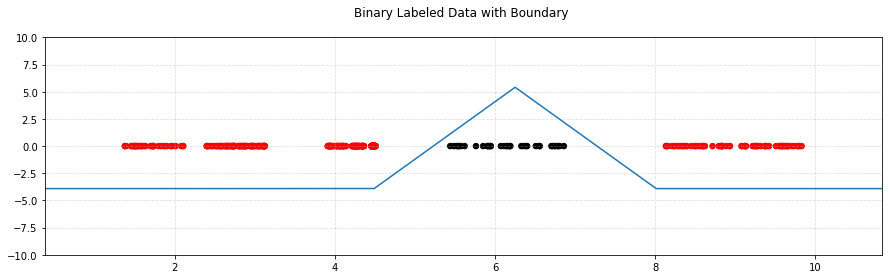

loss: 0.024 acc:  100%
training for center #5 at 9.44


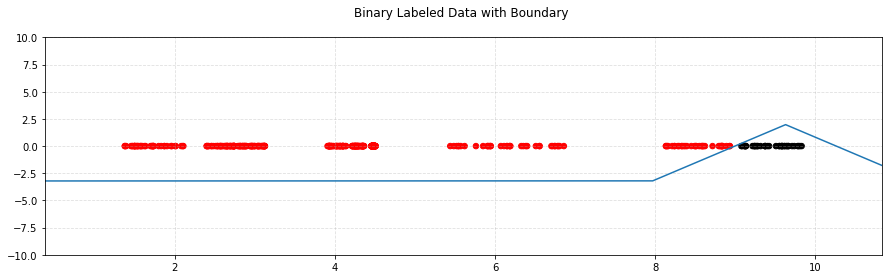

loss: 0.082 acc:  100%


In [31]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision


# Define randomly initialized network

for index, center in enumerate(C):
    # Freeze all neurons except the ones needed for C
    
    mynetwork.train_none()
    mynetwork.reset_weights_to_zero()
    for key in mynetwork.layers.keys():
        # Skip the input layer
                # Skip the input layer
        if key[-1] == '0':
            pass
        else:
            if key == 'L1':
                # Set trainable parameters
                mynetwork.layers[key]['weights_trainable'][index] = 1
                mynetwork.layers[key]['biases_trainable'][index] = 1
                # randomly initialize those weights
                mynetwork.layers[key]['weights'][index] = 1
                mynetwork.layers[key]['biases'][index] = -center
                #print("Layer:",key,"\nweights:\n", mynetwork.layers[key]['weights_trainable'],"\nbiases\n",mynetwork.layers[key]['biases_trainable'] ,'\n')
            if key == 'L2':
                mynetwork.layers[key]['weights_trainable'][index][index] = 1
                mynetwork.layers[key]['biases_trainable'][index] = 1
                # randomly initialize those weights                
                mynetwork.layers[key]['weights'][index][index] = -1
                mynetwork.layers[key]['biases'][index] = R[index]
            if key == 'L3':
                mynetwork.layers[key]['weights_trainable'][0][index] = 1
                mynetwork.layers[key]['biases_trainable'] = 1
                 # randomly initialize those weights                
                mynetwork.layers[key]['weights'][0][index] = np.random.rand()
                mynetwork.layers[key]['biases'] = -0.001
    # Define the temporary MASKED labels Y
    
    Y_mask = nregion.mask(X_train, Y_train, center, R[index])

    
    # Train network for some number of epochs (1000)        
        
    print(f'training for center #{index+1} at {center:.2f}')
    X = X_train
    Y = Y_mask
    learning_rate = R[index]*0.01
    for n in range(50):
        #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
        mynetwork.train_mini_batch(X, Y, learning_rate=learning_rate, num_epochs=3000, batch_size=128, validation_data = False,verbose=False)
        plt.figure(figsize=(15,4))
        plt.scatter(X[:,0], np.zeros(X[:,0].shape), c=Y, cmap='flag', s = 30)
        plt.grid(alpha=.4,linestyle='--')
        X_line = np.arange(min(X[:,0])-1, max(X[:,0])+1, (max(X[:,0])-1 - min(X[:,0])-1)/5000)
        X_line_reshape = X_line.reshape(X_line.shape[0],1)
        Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
        plt.plot(X_line, Y_line)
        plt.title('Binary Labeled Data with Boundary \n')
        plt.ylim(-10,10)
        plt.xlim(min(X[:,0])-1, max(X[:,0])+1)
        x = np.array(range(100))
        plt.show()
        plt.close()
        loss = mynetwork.binary_crossentropy_loss(X,Y)
        acc = mynetwork.accuracy(X,Y)

        print(f"loss: {loss:.3f} acc: {acc: 0.0%}")
        if acc == 1:
            break
    
    
    

In [ ]:
import numpy as np

In [ ]:
mynetwork.layers['L3']['biases_trainable']

In [ ]:
mynetwork.layers['L1']['weights_trainable']

In [ ]:
mynetwork.layers['L2']['weights_trainable'][0][0] = 4

In [ ]:
mynetwork.layers['L2']['weights_trainable'].shape

In [ ]:
first_index
index         = 3

In [ ]:
first_index = min(mynetwork.layers['L3']['weights_trainable'].shape[0],1)-1

In [ ]:
mynetwork.layers['L2']['weights_trainable'][first_index][3] = 5

In [ ]:
mynetwork.layers['L2']['weights_trainable']

# Simple Prediction

In [ ]:
C = C[0]
R = R[0]

# N region initialization

In [ ]:
import numpy as np

In [ ]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

In [ ]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
mynetwork.layers['L1']['biases']

In [ ]:
mynetwork.layers['L2']['weights'].shape[0]

In [ ]:
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']

In [ ]:
mynetwork.layers['L2']['biases'] = np.array(R).reshape(mynetwork.layers['L2']['biases'].shape)+R
mynetwork.layers['L2']['biases']

In [ ]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

In [ ]:
mynetwork.layers['L3']['biases'] = -min(R)
mynetwork.layers['L3']['biases']

# Graph the decision boundary

In [ ]:
def prediction(x):
    return mynetwork.predict(x)-0.5

In [ ]:
# Graph Decision Boundary
nregion.graph(X_train, Y_train, decision = prediction)

In [ ]:
# Graph Decision Boundary|
nregion.graph(X_train, Y_train, decision = mynetwork.decision, padding=8)

In [ ]:
mynetwork.accuracy(X_train,Y_train)

In [ ]:
mynetwork.train_biases_only()

# Backward pass illusrated

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision
learning_rate = 0.001
for n in range(100):
    #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
    mynetwork.train_mini_batch(X_train, Y_train, learning_rate=learning_rate, num_epochs=1000, batch_size=64, validation_data = (X_val,Y_val),verbose=False)
    plt.figure(figsize=(15,4))
    plt.scatter(X_train[:,0], np.zeros(X_train[:,0].shape), c=Y_train, cmap='flag', s = 30)
    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X_train[:,0])-1, max(X_train[:,0])+1, (max(X_train[:,0])-1 - min(X_train[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X_train[:,0])-1, max(X_train[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    loss = mynetwork.binary_crossentropy_loss(X_train,Y_train)
    acc = mynetwork.accuracy(X_train,Y_train)
    val_loss = mynetwork.binary_crossentropy_loss(X_val,Y_val)
    val_acc = mynetwork.accuracy(X_val,Y_val)
    print(f"loss: {loss:.3f} acc: {acc: 0.0%} val_loss: {val_loss:.3f} val_acc: {val_acc: 0.0%}")

In [ ]:
C

In [ ]:
R

In [ ]:
c = C[1]
r = R[2]
X = X_train
Y = Y_train

In [ ]:
print(c,r)

In [ ]:
indices = np.where((X > c-r) & (X < c+r))

In [ ]:
X[indices[0]]

In [ ]:
Y[indices[0]]

In [ ]:
len(Y)

In [ ]:
len(X)

In [ ]:
indices[0]

In [ ]:
Y_new = np.zeros_like(Y)

Y_new[indices[0]] = 1

In [ ]:
Y_new